In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np
import theano.tensor as tt

import matplotlib.pyplot as pl

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
%matplotlib inline

In [8]:
df = pd.read_excel('../../dataJar/Data SO figures.xlsx')
df.drop('#', axis=1, inplace=True)
df.drop('M', axis=1, inplace=True)

In [9]:
df.rename(columns={'Year': 'date'}, inplace=True)

In [10]:
df.rename(columns={f'{COL}': f'{COL.lower()}' for COL in df.columns}, inplace=True)

In [11]:
df.head()

,date,sam,aao,iostz,iosostz,postz,posostz,aostz,aosostz,iopooz,popooz,aopooz,iosaaz,posaaz,aosaaz
0,1997-09-01,0.69,0.122,0.24396,0.19464,0.23765,0.15677,0.35295,0.21213,0.180950,0.154737,0.194558,0.19830,0.16906,0.28457
1,1997-10-01,-1.78,-0.595,0.23801,0.18567,0.25429,0.15624,0.33579,0.24524,0.195581,0.163974,0.235877,0.20853,0.15947,0.35077
2,1997-11-01,-3.17,-1.905,0.22475,0.21562,0.22035,0.20676,0.31870,0.31555,0.221278,0.232293,0.277545,0.25616,0.17670,0.45735
3,1997-12-01,-0.89,-0.835,0.22303,0.26677,0.19563,0.43561,0.27345,0.61580,0.275540,0.301326,0.388892,0.24011,0.18865,0.44453
4,1998-01-01,2.65,0.413,0.17366,0.23300,0.16382,0.30970,0.25799,0.46643,0.199565,0.194234,0.371978,0.21664,0.13944,0.43567


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
date       248 non-null datetime64[ns]
sam        248 non-null float64
aao        248 non-null float64
iostz      248 non-null float64
iosostz    248 non-null float64
postz      248 non-null float64
posostz    248 non-null float64
aostz      248 non-null float64
aosostz    248 non-null float64
iopooz     241 non-null float64
popooz     188 non-null float64
aopooz     248 non-null float64
iosaaz     248 non-null float64
posaaz     248 non-null float64
aosaaz     248 non-null float64
dtypes: datetime64[ns](1), float64(14)
memory usage: 29.1 KB


In [13]:
df.describe()

,sam,aao,iostz,iosostz,postz,posostz,aostz,aosostz,iopooz,popooz,aopooz,iosaaz,posaaz,aosaaz
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,241.000000,188.000000,248.000000,248.000000,248.000000,248.000000
mean,0.519879,0.175113,0.213579,0.216339,0.201598,0.237798,0.292012,0.363231,0.197709,0.193421,0.345294,0.213654,0.184731,0.441675
std,1.701669,0.973178,0.027127,0.058586,0.048607,0.107210,0.043535,0.125154,0.070319,0.057796,0.147801,0.034287,0.022662,0.141194
min,-5.770000,-2.798000,0.142600,0.147280,0.110340,0.119390,0.199870,0.182640,0.128662,0.112061,0.163787,0.158629,0.134620,0.218980
25%,-0.642500,-0.448250,0.194450,0.174935,0.164000,0.163355,0.261736,0.266058,0.164502,0.150147,0.246054,0.187442,0.170730,0.326484
50%,0.580000,0.197000,0.217491,0.201763,0.197431,0.186825,0.281545,0.342921,0.180248,0.171223,0.311200,0.208735,0.183385,0.423374
75%,1.652500,0.884500,0.233288,0.239613,0.231166,0.289744,0.315765,0.444249,0.221227,0.226092,0.409819,0.234868,0.197011,0.540948
max,4.920000,2.573000,0.287270,0.641870,0.335140,0.639570,0.415390,0.969560,1.067500,0.384627,1.422800,0.332510,0.253160,0.906591


In [14]:
df.set_index('date', inplace=True)

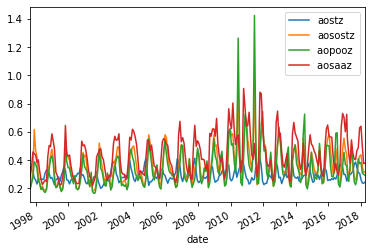

In [15]:
df.filter(regex='^ao', axis=1).plot()

In [16]:
first_values = df.iloc[0]

In [24]:
df_n = (df.subtract(first_values)) / df.std(axis=0)

In [25]:
df.std(axis=0)

sam        1.701669
aao        0.973178
iostz      0.027127
iosostz    0.058586
postz      0.048607
posostz    0.107210
aostz      0.043535
aosostz    0.125154
iopooz     0.070319
popooz     0.057796
aopooz     0.147801
iosaaz     0.034287
posaaz     0.022662
aosaaz     0.141194
dtype: float64

In [26]:
df_n.rename(columns={f'{col}': f'{col.strip()}_n' for col in df_n.columns}, inplace=True)

In [27]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 1997-09-01 to 2018-04-01
Data columns (total 14 columns):
sam_n        248 non-null float64
aao_n        248 non-null float64
iostz_n      248 non-null float64
iosostz_n    248 non-null float64
postz_n      248 non-null float64
posostz_n    248 non-null float64
aostz_n      248 non-null float64
aosostz_n    248 non-null float64
iopooz_n     241 non-null float64
popooz_n     188 non-null float64
aopooz_n     248 non-null float64
iosaaz_n     248 non-null float64
posaaz_n     248 non-null float64
aosaaz_n     248 non-null float64
dtypes: float64(14)
memory usage: 29.1 KB


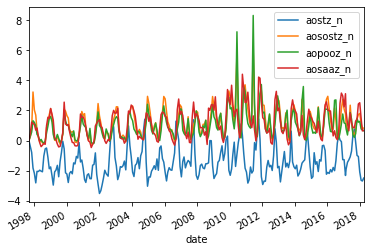

In [28]:
df_n.filter(regex='^ao',).plot();

In [29]:
df_n.to_pickle('../pickleJar/df_normalized.pkl')
df.to_pickle('../pickleJar/df.pkl')